# 量子AND门和量子OR门

## Toffoli门——量子AND门

真值表

$$Output\_c = c \, XOR \, (a \, AND \, b)$$

|a|b|c|output_a|output_b|output_c|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|0|0|0|0|0|
|0|0|1|0|0|1|
|0|1|0|0|1|0|
|0|1|1|0|1|1|
|1|0|0|1|0|0|
|1|0|1|1|0|1|
|1|1|0|1|1|1|
|1|1|1|1|1|0|


In [ ]:
import os

from qiskit.extensions.standard import ccx
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, execute
from qiskit import IBMQ, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city


IBMQ.enable_account(os.getenv('IBMQ'))
backend = Aer.get_backend('statevector_simulator')

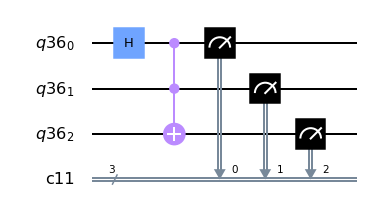

In [38]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.ccx(qr[0], qr[1], qr[2])
qc.measure(qr, cr)
qc.draw('mpl')

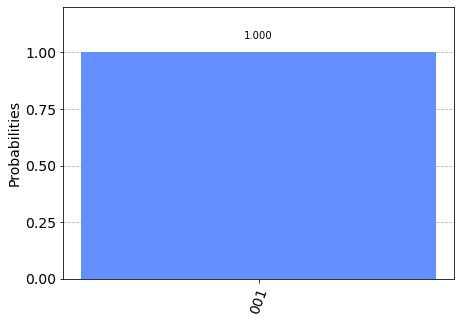

In [40]:
job = execute(qc, backend=backend)
res = job.result()
plot_histogram(res.get_counts(qc))

In [41]:
res.get_statevector(qc, decimals=3)

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

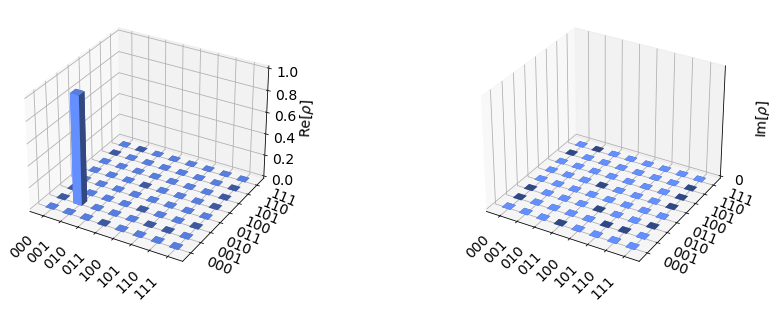

In [42]:
plot_state_city(res.get_statevector(qc, decimals=3))

## 量子OR门

真值表

$$Output\_c = (NOT\; c)\; XOR\; (NOT\; a\; AND\; NOT\; b)$$

|a|b|c|output_a|output_b|output_c|
|:---:|:---:|:---:|:---:|:---:|:---:|
|0|0|0|0|0|0|
|0|0|1|0|0|1|
|0|1|0|0|1|1|
|0|1|1|0|1|0|
|1|0|0|1|0|1|
|1|0|1|1|0|0|
|1|1|0|1|1|1|
|1|1|1|1|1|0|

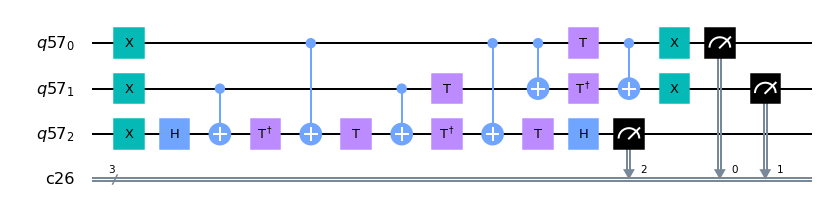

In [57]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[2])
qc.h(qr[2])
qc.cx(qr[1], qr[2])
qc.tdg(qr[2])
qc.cx(qr[0], qr[2])
qc.t(qr[2])
qc.cx(qr[1], qr[2])
qc.tdg(qr[2])
qc.cx(qr[0], qr[2])
qc.t(qr[1])
qc.t(qr[2])
qc.h(qr[2])
qc.cx(qr[0], qr[1])
qc.t(qr[0])
qc.tdg(qr[1])
qc.cx(qr[0], qr[1])
qc.x(qr[0])
qc.x(qr[1])

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.draw('mpl')